In [247]:
import numpy as np

### some data to test 

In [248]:
y_test = np.array([0.0, 0.0, 1.0, 0.0, 1.0, 0.00, 0.00, 0.00, 1.00, 1.00, 0.00, 1.00])
y_pred = np.array([0.2, 0.3, 0.9, 0.1, 0.7, 0.03, 0.78, 0.48, 0.98, 0.45, 0.23, 0.86])

### sort both the arrays based on the pred values

In [249]:
y_test = np.array([x for _, x in sorted(zip(y_pred, y_test), key=lambda pair: pair[0])])
y_pred = sorted(y_pred)

print("y_test:", y_test)
print("y_pred:", y_pred)

y_test: [0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1.]
y_pred: [0.03, 0.1, 0.2, 0.23, 0.3, 0.45, 0.48, 0.7, 0.78, 0.86, 0.9, 0.98]


## ROC curve

In [250]:
tprs = []
ppvs = []
fprs = []

# Go over all possible tresholds (y_pred_values:)
for i, treshold in reversed(list(enumerate(y_pred))):
    y_tresholded = np.greater_equal(y_pred, np.full(len(y_test), treshold)).astype(float)
    
    TP = np.sum(np.logical_and(y_tresholded == 1, y_test == 1))
    TN = np.sum(np.logical_and(y_tresholded == 0, y_test == 0))
    FP = np.sum(np.logical_and(y_tresholded == 1, y_test == 0))
    FN = np.sum(np.logical_and(y_tresholded == 0, y_test == 1))

    tprs.append(np.nan_to_num(TP/(TP+FN)))
    fprs.append(np.nan_to_num(FP/(FP+TN)))
    ppvs.append(np.nan_to_num(TP/(TP+FP)))

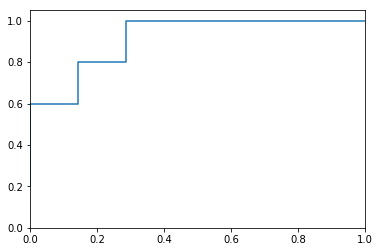

In [251]:
plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fprs, tprs)
plt.show()

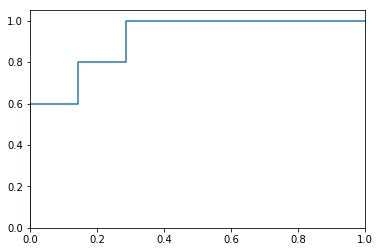

In [252]:
from sklearn.metrics import roc_curve, auc

falsepos, recall, _ = roc_curve(y_test, y_pred)

plt.figure()
plt.plot(falsepos, recall)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.show()

## Precission/Recall curve
- precission = PPV = TP / (TP + FP)
- recall = TPR = TP / (TP + FN)

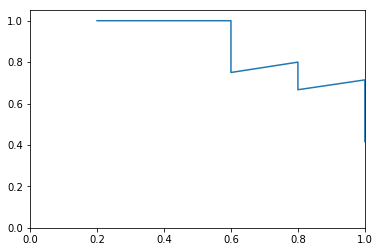

In [253]:
plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(tprs, ppvs)
plt.show()

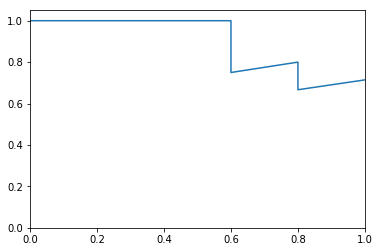

In [254]:
from sklearn.metrics import precision_recall_curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(recall, precision)
plt.show()

# SKLearn way

# Some random dudes way
src: https://gist.github.com/wugh/5e803783e97166a0c878c6f64fa04a21

In [255]:
def roc_auc(y_true, y_score):
    y_true = np.array(y_true)
    y_score = np.array(y_score)

    # comput fpr and tpr
    desc_index = np.argsort(y_score)[::-1]
    y_score = y_score[desc_index]
    y_true = y_true[desc_index]
    # threshold is y_score[i]
    # score <= y_score[i] compute true pos num (tps[i])
    # and false pos num (fps[i])
    tps = np.cumsum(y_true)
    fps = 1 + np.arange(len(y_true)) - tps
    fpr = fps/float(fps[-1])
    tpr = tps/float(tps[-1])

    # reorder fpr and tpr according to fpr increase
    incr_index = np.argsort(fpr)
    fpr = fpr[incr_index]
    tpr = tpr[incr_index]
    
    return tpr, fpr

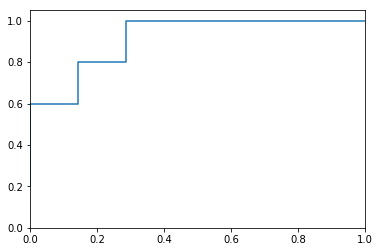

In [256]:
tpr, fpr = roc_auc(y_test, y_pred)

plt.figure()
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.plot(fpr, tpr)
plt.show()